<a href="https://colab.research.google.com/github/TomS55555/Machine-learning/blob/main/Decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision trees

## Key take-aways:

- A decision tree is split on individual features, therefore normalization is not as important
- Good interpretability
- Very flexible: both categorical and quantitative variables are easily added


### What are they? 
Classification and regression trees (CART) are defined by recursively partitioning the input space, and defining a local model in each resulting region of the input space. The model can be represented by a tree, with one leaf per region.  
The tree consists of a set of nested decision rules. At each node $i$, a specific feature dimension $d_i$ of the input vector $\mathbf{x}$ is compared to a threshold value $t_i$ and the input is then passed down to the left or to the right branch, depending on whether it is above or below the threshold.  
A regression tree on a dataset $\mathcal{D}=\{\mathbf{x}_i,y_i\}_{i=1}^N$ can then be defined as 
\begin{equation}
f(\mathbf{x}; 𝛉 ) = \sum_{j=1}^J w_j \mathbb{I}(\mathbf{x}\in R_j)
\end{equation} 
where $J$ is the amount of leaf nodes and each $w_j$ is the average value of all examples classified in region $R_j$ such that $𝛉=\{(R_j,w_j):j=1:J\}$ and $$w_j = \frac{\sum_{n=1}^Ny_n\mathbb{I}(\mathbf{x}\in R_j)}{\sum_{n=1}^N\mathbb{I}(\mathbf{x}\in R_j)}$$  
For classification problems, the leaves contain distributions over the labels, rather than just the mean response.  
### How to fit them?
To fit the model, a loss function needs to be defined:
\begin{equation}
\mathcal{L}(𝛉) = \sum_{n=1}^N\ell(y_n, f(\mathbf{x}_n,𝛉)) = \sum_{j=1}^J\sum_{\mathbf{x}_n\in R_j} \ell(y_i,w_j)
\end{equation}
This loss is not differentiable because the discrete tree structure needs to be learned. Furthermore finding the optimal partitioning of the data is NP-complete (non-deterministic polynomial time). The standard procedure is to iteratively grow the tree. It works as follows:   
* Each node $i$ a reached by a subset of the dataset: $\mathcal{D}_i=\{\mathbf{x}_i,y_i\}_{i=1}^{N_i}$ which is split in the node into a left dataset $\mathcal{D}_i^L(j,t)=\{(\mathbf{x}_n,y_n)\in N_i:y_{n,j}\leq t\}$ and a right dataset $\mathcal{D}_i^R(j,t)=\{(\mathbf{x}_n,y_n)\in N_i:y_{n,j} > t\}$. The best feature dimension $j_i$ and the best feature value $t_i$ is chosen as follows:
\begin{equation}
(j_i, t_i) = \arg \min_{j\in \{1 \hdots D\}}\min_{t\in\mathcal{T}_j}{\frac{|\mathcal{D}_i^L(j,t)|}{|\mathcal{D}|}c(\mathcal{D}_i^L(j,t))+\frac{|\mathcal{D}_i^R(j,t)|}{|\mathcal{D}|}c(\mathcal{D}_i^R(j,t))}
\end{equation}
* The set of possible thresholds $\mathcal{T}_j$ for each feature $j$ can be obtained by sorting the unique values of $\{x_{nj}\}$.
* The cost function itself can be chosen for regression for example the mean squared error: $$ c(\mathcal{D}_i) = \frac{1}{|\mathcal{D}_i|}\sum_{n\in \mathcal{D}_i} (y_n-\bar{y})^2 $$
* For classification, we first compute the empirical distribution over class labels at each node:
$$ \hat{\pi}_{ic}=\frac{1}{\mathcal{D_i}}\sum_{n\in\mathcal{D}_i}\mathbb{I}(y_n=c)$$
Given this, we can then compute the expected error rate (Gini index):
$$G_i =  \sum_{c=1}^C\hat{\pi}_{ic}(1-\hat{\pi}_{ic})=1-\sum_{c=1}^C\hat{\pi}_{ic}^2$$

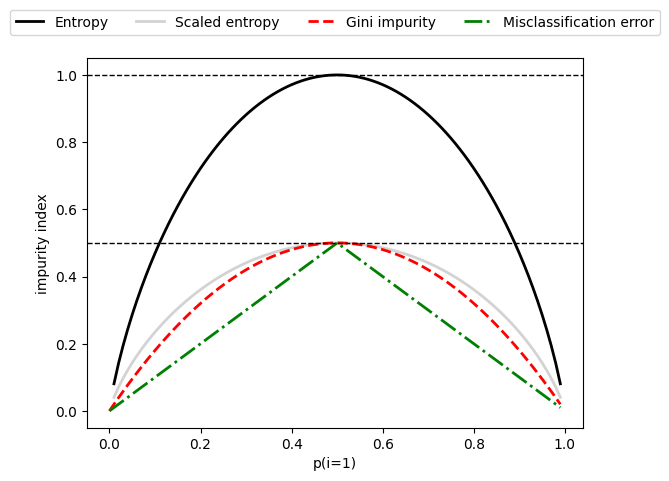

In [4]:
# A comparison between the different impurity criteria:
import matplotlib.pyplot as plt 
import numpy as np 
def gini(p):
    return p*(1-p) + (1-p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2((1-p)) 
def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p!= 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Scaled entropy', 'Gini impurity', 'Misclassification error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=5, shadow=False, fancybox=True);
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()